# Learn NetCDF handling Python with ClimoMarineLab 
https://github.com/akashspunnayil/ClimoMarineLab

## Installing necessary packages for this notebook 

In [1]:
# !pip install xarray
# !pip install numpy
# !pip install matplotlib
# !pip install pandas

## Load packages 

In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar

## Import data

In [3]:
data_path = './' #current directory
data = xr.open_dataset(data_path+'NOAA_ERSST_V5_1981-2010.nc', decode_times=False)
print(data.info)

<bound method Dataset.info of <xarray.Dataset>
Dimensions:             (lat: 89, lon: 180, time: 12, nbnds: 2)
Coordinates:
  * lat                 (lat) float32 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0
  * lon                 (lon) float32 0.0 2.0 4.0 6.0 ... 354.0 356.0 358.0
  * time                (time) float64 -6.571e+05 -6.57e+05 ... -6.567e+05
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) float64 ...
    sst                 (time, lat, lon) float32 ...
    valid_yr_count      (time, lat, lon) float32 ...
Attributes: (12/37)
    climatology:                    Climatology is based on 1971-2000 SST, Xu...
    description:                    In situ data: ICOADS2.5 before 2007 and N...
    keywords_vocabulary:            NASA Global Change Master Directory (GCMD...
    keywords:                       Earth Science > Oceans > Ocean Temperatur...
    instrument:                     Conventional thermometers
    source_comment:          

## Read variables 

In [4]:
sst = data['sst']
latitude = data['lat']
longitude = data['lon']
time = data['time']

print(sst.shape)
print(sst.dims)

(12, 89, 180)
('time', 'lat', 'lon')


# Select a single location for the following plots

In [5]:
# Select the geographic location you are interested in using the .sel() method.
# Replace 'latitude' and 'longitude' with the specific coordinates you want.
# For example, if you want to select a location at latitude 13 and longitude 75:

target_latitude = 10.0  # Replace with your desired latitude
target_longitude = 75.0  # Replace with your desired longitude

# Select the data at the specified location without finding the nearest neighbor.
selected_location_sst = sst.sel(lat=target_latitude, lon=target_longitude, method='nearest')


# Plot a time series of single location - LINE CHART


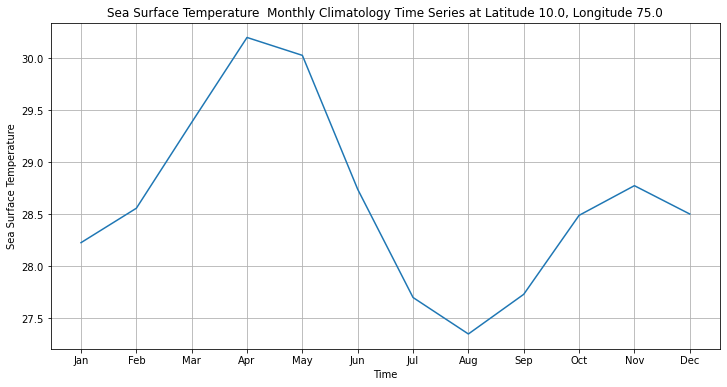

In [6]:

# Plot the time series data.
plt.figure(figsize=(12, 6))
plt.plot(selected_location_sst)
months = [calendar.month_abbr[i] for i in range(1, 13)]  # Abbreviated month names
plt.xticks(range(len(months)), months)
plt.title(f'Sea Surface Temperature  Monthly Climatology Time Series at Latitude {target_latitude}, Longitude {target_longitude}')
plt.xlabel('Time')
plt.ylabel('Sea Surface Temperature')
plt.grid()

# Save the plot as an image (e.g., in JPG format).
plt.savefig('sst_line_plot.jpg')


plt.show()



# BAR CHART


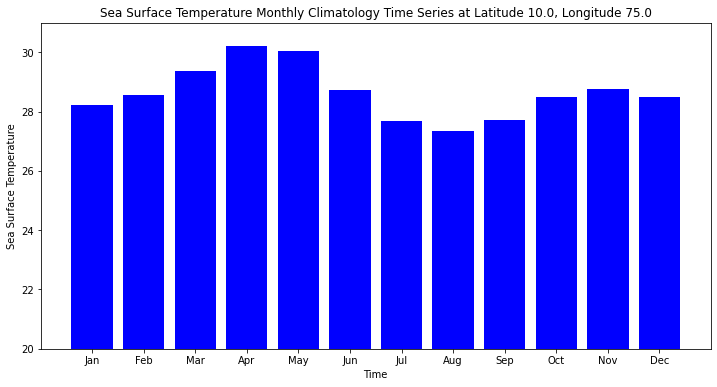

In [7]:

# Create a bar plot for the time series data.
plt.figure(figsize=(12, 6))
plt.bar(range(len(selected_location_sst)), selected_location_sst, color='blue')
onths = [calendar.month_abbr[i] for i in range(1, 13)]  # Abbreviated month names
plt.xticks(range(len(months)), months)
plt.title(f'Sea Surface Temperature Monthly Climatology Time Series at Latitude {target_latitude}, Longitude {target_longitude}')
plt.xlabel('Time')
plt.ylabel('Sea Surface Temperature')
plt.ylim(20,31)

# Save the plot as an image (e.g., in JPG format).
plt.savefig('sst_bar_plot.jpg')


plt.show()



# SCATTER PLOT


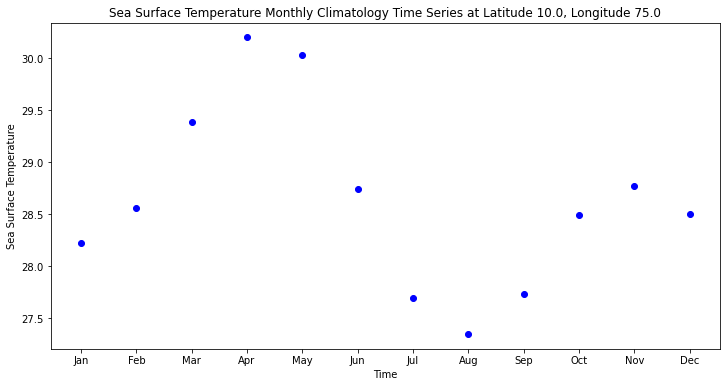

In [8]:

# Create a bar plot for the time series data.
plt.figure(figsize=(12, 6))
plt.scatter(range(len(selected_location_sst)), selected_location_sst, color='blue')
months = [calendar.month_abbr[i] for i in range(1, 13)]  # Abbreviated month names
plt.xticks(range(len(months)), months)
plt.title(f'Sea Surface Temperature Monthly Climatology Time Series at Latitude {target_latitude}, Longitude {target_longitude}')
plt.xlabel('Time')
plt.ylabel('Sea Surface Temperature')

# Save the plot as an image (e.g., in JPG format).
plt.savefig('sst_scatter_plot.jpg')


plt.show()



# Mean, Standard Deviation, Minimum, Maximum, Median

In [9]:
# Calculate basic statistics
mean = np.mean(selected_location_sst)
std_dev = np.std(selected_location_sst)
min_val = np.min(selected_location_sst)
max_val = np.max(selected_location_sst)
median = np.median(selected_location_sst)

# Print the statistics
print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")
print(f"Minimum Value: {min_val}")
print(f"Maximum Value: {max_val}")
print(f"Median: {median}")


Mean: <xarray.DataArray 'sst' ()>
array(28.640951, dtype=float32)
Coordinates:
    lat      float32 10.0
    lon      float32 76.0
Standard Deviation: <xarray.DataArray 'sst' ()>
array(0.84443927)
Coordinates:
    lat      float32 10.0
    lon      float32 76.0
Minimum Value: <xarray.DataArray 'sst' ()>
array(27.34835815)
Coordinates:
    lat      float32 10.0
    lon      float32 76.0
Maximum Value: <xarray.DataArray 'sst' ()>
array(30.20246124)
Coordinates:
    lat      float32 10.0
    lon      float32 76.0
Median: 28.530845642089844


# Trendline over the time series

Coefficients (slope, intercept): [-0.0794585  29.07797293]


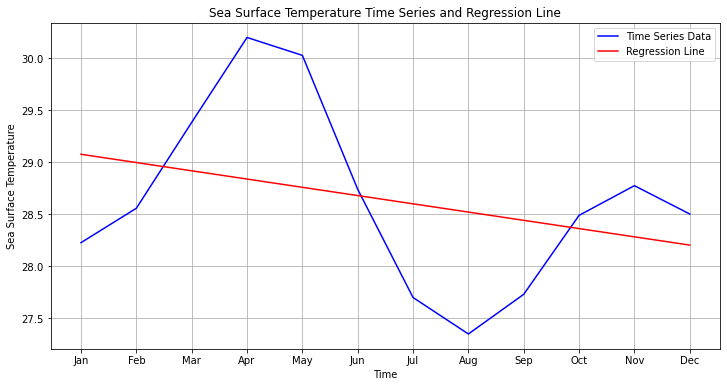

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame with 'time' and 'sst' columns.
# You can convert the xarray DataArray to a pandas DataFrame and specify the index and column as needed.

# Create a pandas DataFrame with the selected time series data
data = pd.DataFrame({'time': range(len(selected_location_sst)), 'sst': selected_location_sst.values})

# Fit a polynomial regression model (e.g., a linear regression, i.e., a polynomial of degree 1)
coefficients = np.polyfit(range(len(selected_location_sst)), data['sst'], deg=1)

# Create a polynomial using the coefficients
poly = np.poly1d(coefficients)
# Calculate the y_fit values using the polynomial
y_fit = poly(range(len(selected_location_sst)))
             
# Plot the time series data and the regression line
plt.figure(figsize=(12, 6))
plt.plot(range(len(selected_location_sst)), data['sst'], label='Time Series Data', color='blue')
plt.plot(range(len(selected_location_sst)), y_fit, label='Regression Line', color='red')
months = [calendar.month_abbr[i] for i in range(1, 13)]  # Abbreviated month names
plt.xticks(range(len(months)), months)
plt.title(f'Sea Surface Temperature Time Series and Regression Line')
plt.xlabel('Time')
plt.ylabel('Sea Surface Temperature')
plt.legend()
plt.grid()

# Print the coefficients and R-squared value
print(f"Coefficients (slope, intercept): {coefficients}")

# Save the plot as an image (e.g., in JPG format).
plt.savefig('sst_line_with_trendline_plot.jpg')

# Show the plot
plt.show()



# END OF CODE

Feel free to reach out to the author if you have any questions or need assistance: Akash (akashspunnayil@gmail.com)